In [1]:
import numpy as np
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt

In [2]:
raw_file = pd.read_csv('air_passengers.txt', index_col = 0, parse_dates = [0])
print('Shape of dataframe: ', raw_file.shape)
raw_file.head()

Shape of dataframe:  (144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


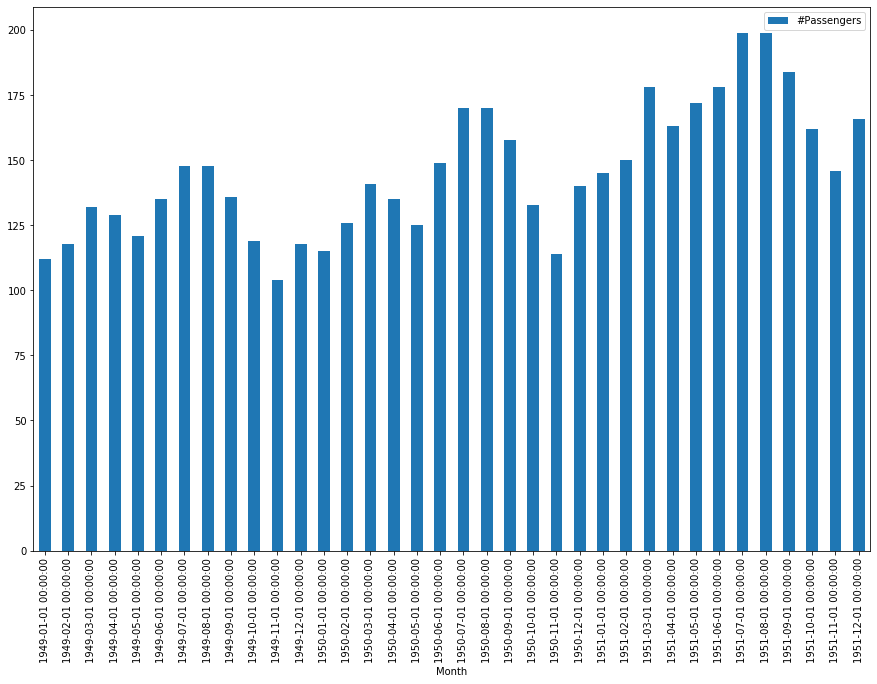

In [3]:
raw_file['1949':'1951'].plot(kind = 'bar', figsize = (15,10))

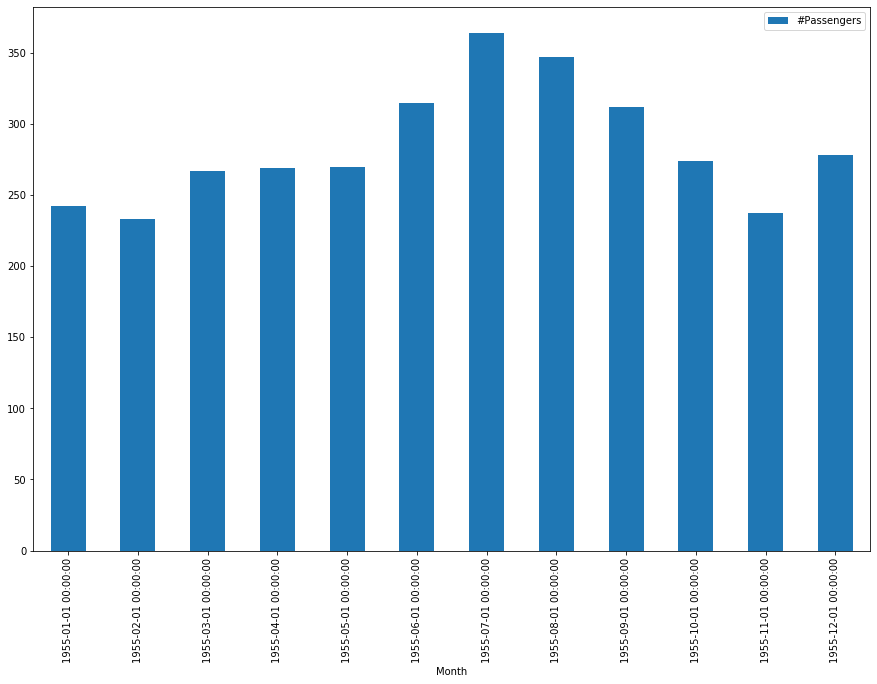

In [4]:
raw_file['1955'].plot(kind = 'bar', figsize = (15,10))

## Common analysis techniques:
### is it stationary: mean, variance, autocovariance do not depend on time

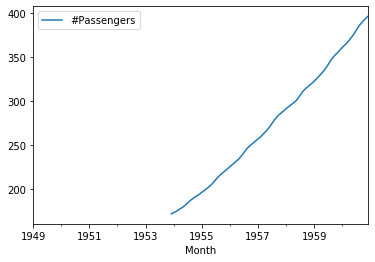

In [5]:
# first test, informally, plot the moving average
# rolling function
raw_file.rolling(window = 60).mean().plot()

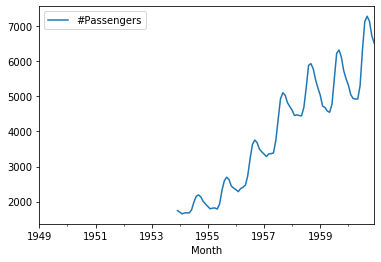

In [6]:
# check for the variance, if it changes with time, in rolling window
raw_file.rolling(window = 60).var().plot()

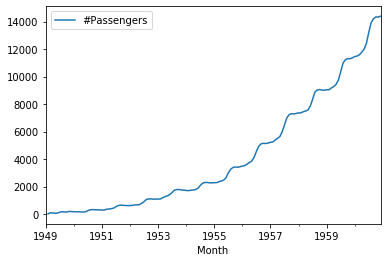

In [7]:
# check for the variance, if it changes with time, in expanded
raw_file.expanding().var().plot()

### Plot the change in number of passengers relative to previous month

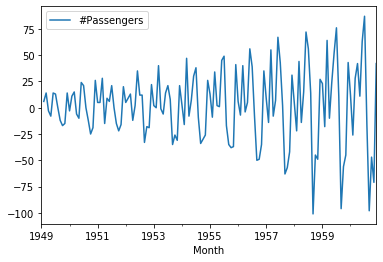

In [8]:
(raw_file - raw_file.shift(periods = 1)).plot()

In [9]:
from statsmodels.tsa.stattools import acf

Autocorrelation
* how a point t is correlated to point at t-1 for the entire time series

/home/arjun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


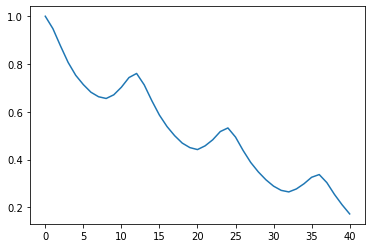

In [10]:
plt.plot(acf(raw_file))

### Dickey fuller test

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
ad_fuller_result = adfuller(raw_file.values, autolag = 'AIC')
print('Test Statistics: ', ad_fuller_result[0])
print('p-value: ', ad_fuller_result[1])
print('No. of lags used: ', ad_fuller_result[2])

# dickey_fuller_test_results.index = ['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used']

Test Statistics:  0.8153688792060423
p-value:  0.9918802434376409
No. of lags used:  13


* p value should be less than 0.05 in order to come to a conclusion that the data is stationary.